# Naive Bayes Spam Classification Assignment
Dataset: `spam_binary_features.csv`

In [1]:
# 1. Load Dataset and Display First 10 Rows
import pandas as pd
df = pd.read_csv('Datasets/spam_binary_features.csv')
df.head(10)

free  win  call  offer  urgent  cash  prize  claim  now  congratulations  \
0     0    0     0      0       0     0      0      0    0                0   
1     0    0     0      0       0     0      0      0    0                0   
2     1    1     0      0       0     0      0      0    0                0   
3     0    0     0      0       0     0      0      0    0                0   
4     0    0     0      0       0     0      0      0    0                0   
5     0    0     0      0       0     0      0      0    1                0   
6     0    0     0      0       0     0      0      0    0                0   
7     0    0     0      0       0     0      0      0    0                0   
8     0    0     1      0       0     0      1      1    0                0   
9     1    0     1      0       0     0      0      0    0                0   

   spam  
0     0  
1     0  
2     1  
3     0  
4     0  
5     1  
6     0  
7     0  
8     1  
9     1

In [2]:
# Count of Spam vs Non-Spam Messages
df['spam'].value_counts()

spam
0    4825
1     747
Name: count, dtype: int64

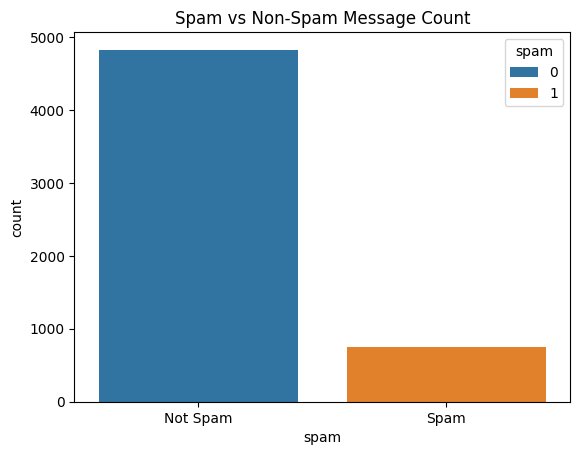

In [3]:
# 2. Bar Plot of Spam vs Non-Spam
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='spam', data=df, hue='spam')
plt.title('Spam vs Non-Spam Message Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.show()

In [4]:
# 3. Keyword Frequency by Class
keywords = df.columns[:-1]
spam_group = df.groupby('spam')[keywords].sum().T
spam_group.columns = ['Not Spam', 'Spam']
spam_group.plot(kind='bar', figsize=(12,6))
plt.title('Keyword Frequency in Spam vs Non-Spam')
plt.ylabel('Frequency')
plt.xlabel('Keyword')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

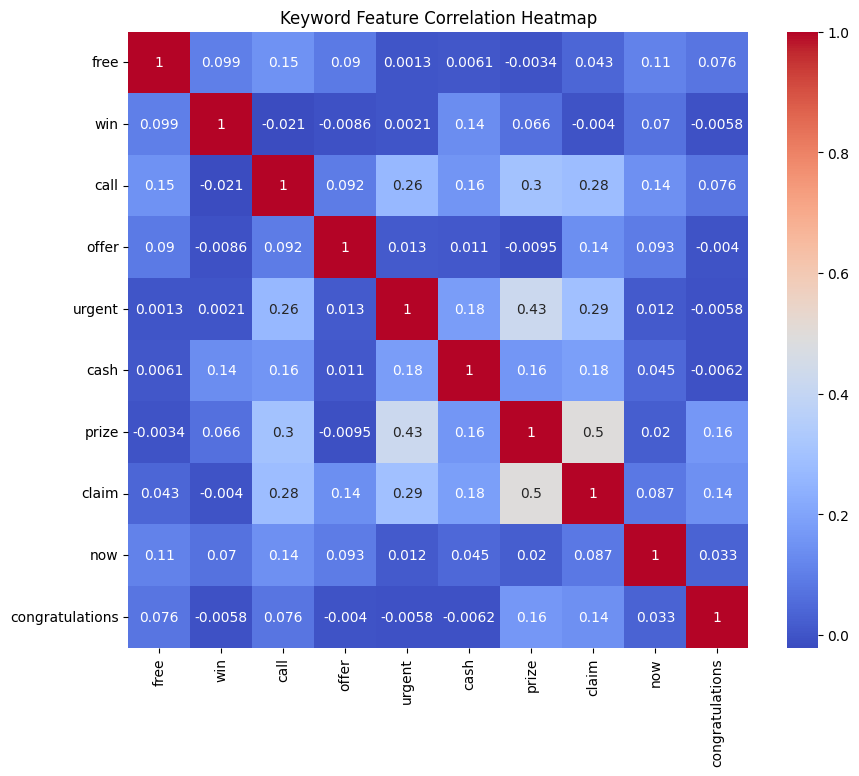

In [5]:
# 4. Correlation Heatmap
corr = df[keywords].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Keyword Feature Correlation Heatmap')
plt.show()

In [11]:
# 5. Train-Test Split
from sklearn.model_selection import train_test_split
X = df.drop('spam', axis=1)
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((3900, 10), (1672, 10))

In [12]:
# 6.1 GaussianNB Training and Evaluation
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)


Accuracy: 0.9084928229665071
Precision: 0.8173076923076923
Recall: 0.3881278538812785
F1 Score: 0.5263157894736842


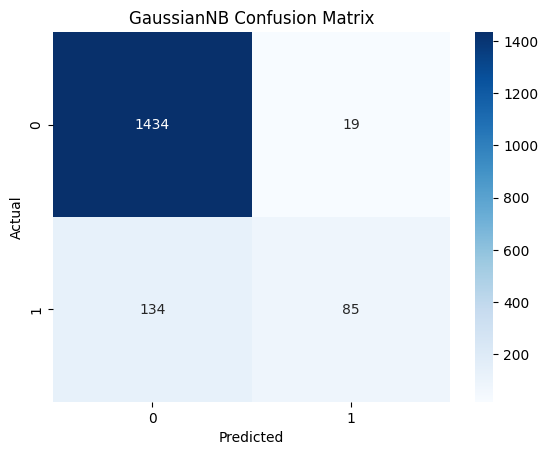

In [13]:
# 6.2 GaussianNB Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Precision:", precision_score(y_test, y_pred_gnb))
print("Recall:", recall_score(y_test, y_pred_gnb))
print("F1 Score:", f1_score(y_test, y_pred_gnb))
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d', cmap='Blues')
plt.title('GaussianNB Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
# 7.1 MultinomialNB Training and Evaluation
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

In [15]:
# 7.2 MultinomialNB Training and Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Precision:", precision_score(y_test, y_pred_mnb))
print("Recall:", recall_score(y_test, y_pred_mnb))
print("F1 Score:", f1_score(y_test, y_pred_mnb))
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d', cmap='Greens')
plt.title('MultinomialNB Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.8971291866028708
Precision: 0.9795918367346939
Recall: 0.2191780821917808
F1 Score: 0.3582089552238806


In [16]:
# 8. Class Prior Probabilities
print("GaussianNB Class Priors:", gnb.class_prior_)
print("MultinomialNB Class Log Priors:", mnb.class_log_prior_)

GaussianNB Class Priors: [0.86461538 0.13538462]
MultinomialNB Class Log Priors: [-0.14547051 -1.99963555]


In [17]:
# 10. Top 5 Indicative Spam Features (MultinomialNB)
import numpy as np
spam_log_probs = mnb.feature_log_prob_[1]
sorted_indices = np.argsort(spam_log_probs)[-5:][::-1]
top_features = [X.columns[i] for i in sorted_indices]
top_probs = spam_log_probs[sorted_indices]
plt.barh(top_features[::-1], top_probs[::-1])
plt.title('Top 5 Spam-Indicative Features (MultinomialNB)')
plt.xlabel('Log Probability')
plt.show()

In [18]:
# 11. Manual Test Samples
test_samples = pd.DataFrame([
    [1,0,1,0,1,0,0,0,1,1],  # Likely spam
    [0,0,1,0,0,0,0,0,0,0],  # Likely not spam
    [1,1,1,1,1,1,1,1,1,1]   # Extreme spammy sample
], columns=X.columns)
predictions = mnb.predict(test_samples)
print("Predictions (0=Not Spam, 1=Spam):", predictions)

Predictions (0=Not Spam, 1=Spam): [1 0 1]
